# 머신러닝 돌리기

## 데이터 불러오기

In [1]:
import re, json
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
PATH = '/home/ai-sjjy/workspace/juyoung/HousePrices/dataset/'

In [3]:
TRAIN = 'train.csv'
TEST = 'test.csv'

SAMPLE = 'sample_submission.csv'

In [4]:
TRAIN = pd.read_csv(PATH + TRAIN)
TEST = pd.read_csv(PATH + TEST)

## 데이터 전처리

OverallQual      0.790982 <br>
GrLivArea        0.708624 <br>
GarageCars       0.640409 <br>
GarageArea       0.623431 <br>
TotalBsmtSF      0.613581 <br>

이 속성 값만 가지고 진행 일단

* 결측치는 drop 일단!

In [5]:
categorical_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'ExterQual']

In [6]:
train_df = TRAIN[categorical_features + ['SalePrice']]
test_df = TEST[categorical_features+['Id']]

In [7]:
train_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,SalePrice
0,7,1710,2,548,856,Gd,208500
1,6,1262,2,460,1262,TA,181500
2,7,1786,2,608,920,Gd,223500
3,7,1717,3,642,756,TA,140000
4,8,2198,3,836,1145,Gd,250000


In [8]:
test_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,Id
0,5,896,1.0,730.0,882.0,TA,1461
1,6,1329,1.0,312.0,1329.0,TA,1462
2,5,1629,2.0,482.0,928.0,TA,1463
3,6,1604,2.0,470.0,926.0,TA,1464
4,8,1280,2.0,506.0,1280.0,Gd,1465


In [9]:
train_df.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
ExterQual      0
SalePrice      0
dtype: int64

In [10]:
test_df.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
GarageArea     1
TotalBsmtSF    1
ExterQual      0
Id             0
dtype: int64

In [11]:
# 일단 결측치 제거!
test_df.dropna(axis=0, inplace=True)

<ipython-input-11-0c8d76f02737>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.dropna(axis=0, inplace=True)


In [12]:
test_df.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
ExterQual      0
Id             0
dtype: int64

#### 카테고리형 데이터(Categorical Data)를 수치형 데이터(Numerical Data)로 변환

* [방법 1] : from sklearn.preprocessing import LabelEncoder
    
    => (ex) le.fit_transform(train['Sex']) => 정수로 인덱싱
           
           # array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
            #        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
            #        0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
            #        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
            #        0, 1, 1, 1, 1.... 1, 1])
    => le.inverse_transform(result)를 통해 역 변환 가능!
    
* [방법 2] : get_dummies

    => get_dummies는 원핫인코딩을 매우 쉽게 해준다.
    => category형 데이터 컬럼을 선택하여 자동으로 원핫인코딩을 해준다.
    => (ex) pd.get_dummies(train['Sex'])
    
            female과 male 컬럼 생성

#### [방법 1] - LabelEncoder() 이용

* method1_train_df = train_df
* method1_test_df = test_df

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
method1_train_df = train_df.copy()
method1_test_df = test_df.copy()

In [15]:
# 범주형 데이터만
category = ['ExterQual']

In [16]:
for categorical_feature in category:
    method1_train_df[categorical_feature] = method1_train_df[categorical_feature].astype('category')
for categorical_feature in category:
    method1_test_df[categorical_feature] = method1_test_df[categorical_feature].astype('category') 

In [17]:
method1_train_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,SalePrice
0,7,1710,2,548,856,Gd,208500
1,6,1262,2,460,1262,TA,181500
2,7,1786,2,608,920,Gd,223500
3,7,1717,3,642,756,TA,140000
4,8,2198,3,836,1145,Gd,250000
...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,TA,175000
1456,6,2073,2,500,1542,TA,210000
1457,7,2340,1,252,1152,Ex,266500
1458,5,1078,1,240,1078,TA,142125


In [18]:
le = LabelEncoder()

for categorical_feature in category:
    method1_train_df[categorical_feature] = le.fit_transform(method1_train_df[categorical_feature])
    
for categorical_feature in category:
    method1_test_df[categorical_feature] = le.fit_transform(method1_test_df[categorical_feature])

In [19]:
method1_train_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,SalePrice
0,7,1710,2,548,856,2,208500
1,6,1262,2,460,1262,3,181500
2,7,1786,2,608,920,2,223500
3,7,1717,3,642,756,3,140000
4,8,2198,3,836,1145,2,250000
...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,3,175000
1456,6,2073,2,500,1542,3,210000
1457,7,2340,1,252,1152,0,266500
1458,5,1078,1,240,1078,3,142125


In [20]:
method1_test_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,Id
0,5,896,1.0,730.0,882.0,3,1461
1,6,1329,1.0,312.0,1329.0,3,1462
2,5,1629,2.0,482.0,928.0,3,1463
3,6,1604,2.0,470.0,926.0,3,1464
4,8,1280,2.0,506.0,1280.0,2,1465
...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,3,2915
1455,4,1092,1.0,286.0,546.0,3,2916
1456,5,1224,2.0,576.0,1224.0,3,2917
1457,5,970,0.0,0.0,912.0,3,2918


In [21]:
train_col = set(method1_train_df.columns.tolist())
test_col = set(method1_test_df.columns.tolist())
print(train_col - test_col)
print()
print(test_col - train_col)

{'SalePrice'}

{'Id'}


#### [방법 2] - get dummies 이용

* method2_train_df = train_df
* method2_test_df = test_df

In [22]:
method2_train_df = train_df.copy()
method2_test_df = test_df.copy()

In [23]:
# get dummies => one_hot encoding과 동일하게 만들어 준다
for categorical_feature in category:
    df_all_dummy = pd.get_dummies(method2_train_df[categorical_feature], prefix=categorical_feature)
    method2_train_df = method2_train_df.drop([categorical_feature], axis=1)
    method2_train_df = pd.concat((method2_train_df, df_all_dummy), axis=1)
    
# get dummies => one_hot encoding과 동일하게 만들어 준다
for categorical_feature in category:
    df_all_dummy = pd.get_dummies(method2_test_df[categorical_feature], prefix=categorical_feature)
    method2_test_df = method2_test_df.drop([categorical_feature], axis=1)
    method2_test_df = pd.concat((method2_test_df, df_all_dummy), axis=1)

In [24]:
method2_train_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,7,1710,2,548,856,208500,0,0,1,0
1,6,1262,2,460,1262,181500,0,0,0,1
2,7,1786,2,608,920,223500,0,0,1,0
3,7,1717,3,642,756,140000,0,0,0,1
4,8,2198,3,836,1145,250000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,175000,0,0,0,1
1456,6,2073,2,500,1542,210000,0,0,0,1
1457,7,2340,1,252,1152,266500,1,0,0,0
1458,5,1078,1,240,1078,142125,0,0,0,1


In [25]:
method1_y = method1_train_df['SalePrice']
method1_train_df = method1_train_df.drop('SalePrice', axis=1)

In [26]:
method2_y = method2_train_df['SalePrice']
method2_train_df = method2_train_df.drop('SalePrice', axis=1)

## 데이터 세트(train, validation)a split

#### 입력 데이터 확인
[method1_test_df, method2_test_df]

* X : method1_train_df, method2_train_df
* y : method1_y, method2_y

In [27]:
from sklearn.model_selection import train_test_split # 데이터 셋 

# 방법 1
X_train1, X_val1, y_train1, y_val1 = train_test_split(method1_train_df, method1_y, \
                                                      test_size=0.2, random_state=0)

# 방법 2
X_train2, X_val2, y_train2, y_val2 = train_test_split(method2_train_df, method2_y, \
                                                      test_size=0.2, random_state=0)

In [28]:
print(len(X_train1))
print(len(y_train1))
print(len(X_val1))
print(len(y_val1))

1168
1168
292
292


## 모델 선언 및 훈련

In [29]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

from xgboost.sklearn import XGBRegressor
import xgboost

* 회귀의 평가 지표 : 실제 값과 회귀 예측값의 차이를 기반

회귀 평가지표 : MAE, MSE, RMSE, MSLE, RMSLE <br>
=> 참고로 값이 작을수록 좋은 것

* RMSE : MSE의 루트를 씌운 것.<BR>
=> 오류 지표를 실제 값과 유사한 단위로 다시 변환하기에 해석이 다소 용이하다

*  MAE (Mean Absolue Error) : 실제 값과 예측 값의 차이를 절댓값으로 변환해 평균함 <BR>
=> MSE를 활용할 경우 error값이 클 경우 그에 제곱된 값이 출력되기 때문에 값이 너무 커져 보기 불편, 그래서 MAE 사용<BR>
    
* R^2  : R² 는 분산 기반으로 예측 성능을 평가한다. 1에 가까울수록 예측 정확도가 높은 것<BR>
=> (R² = 예측값 Variance / 실제값 Variance)

In [30]:
def evaluation(model, train_x, train_y, val_x, val_y):
    cv = cross_val_score(model, train_x, train_y, cv = 10)
    y_pred = model.predict(val_x)
    cv = np.mean(cv)
    r2=r2_score(y_pred, val_y)
    mae = mean_absolute_error(y_pred, val_y)
    mse = mean_squared_error(y_pred, val_y)

    return cv, r2, mae, mse

In [31]:
def show_plot(model, val_x, val_y):
    y_pred = model.predict(val_x)

    plt.scatter(val_y, y_pred)
    plt.xlabel("Price Index: $Y_i$")
    plt.ylabel("Predicted price Index: $\hat{Y}_i$")
    plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

### [1] Linear Regression

* 선형 회귀 분석 = Linear Regression

In [32]:
lgs=LinearRegression()
lgs.fit(X_train1, y_train1)

LinearRegression()

In [33]:
print("Accuracy : %f" % lgs.score(X_val1, y_val1)) # score()함수 => 정확도 측정

Accuracy : 0.654327


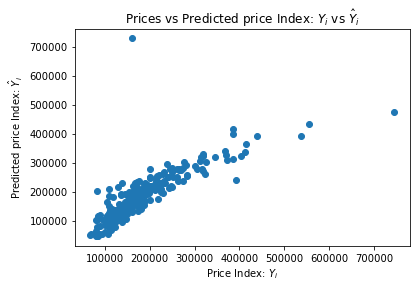

In [34]:
show_plot(lgs, X_val1, y_val1)

In [35]:
lgs=LinearRegression()
lgs.fit(X_train2, y_train2)

LinearRegression()

In [36]:
print("Accuracy : %f" % lgs.score(X_val2, y_val2)) # score()함수 => 정확도 측정

Accuracy : 0.653113


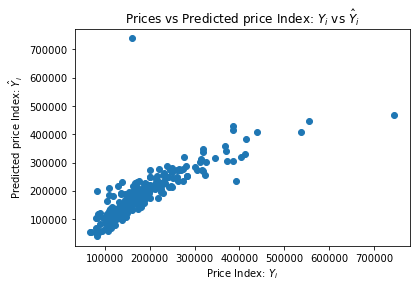

In [37]:
show_plot(lgs, X_val2, y_val2)

### [2] GradientBoostingRegressor

In [38]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=31)
gbr.fit(X_train1, y_train1)

GradientBoostingRegressor(max_depth=10, n_estimators=1000, random_state=31)

In [39]:
result = evaluation(gbr, X_train1, y_train1, X_val1, y_val1)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.7298446138202321
R^2 score: 0.828128172511679
Mean Absolute Erro: 23926.125713365018
Mean Mean Squared Erro: 1273812134.0231745


In [40]:
print("Accuracy : %f" % gbr.score(X_val1, y_val1)) # score()함수 => 정확도 측정

Accuracy : 0.815546


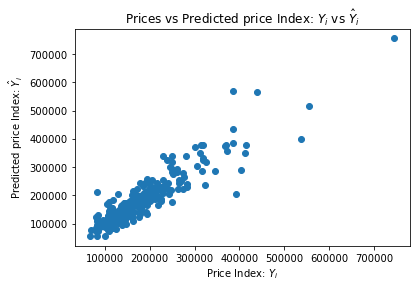

In [41]:
show_plot(gbr, X_val1, y_val1)

In [42]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=31)
gbr.fit(X_train2, y_train2)

GradientBoostingRegressor(max_depth=10, n_estimators=1000, random_state=31)

In [43]:
result = evaluation(gbr, X_train2, y_train2, X_val2, y_val2)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.7373291342685419
R^2 score: 0.8266814242276678
Mean Absolute Erro: 24158.230371666676
Mean Mean Squared Erro: 1286687201.7325878


In [44]:
print("Accuracy : %f" % gbr.score(X_val2, y_val2)) # score()함수 => 정확도 측정

Accuracy : 0.813682


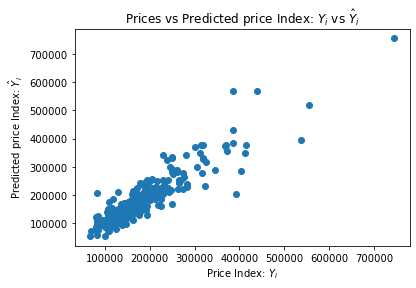

In [45]:
show_plot(gbr, X_val2, y_val2)

### [3] Random Forest Model

In [46]:
forest=RandomForestRegressor(bootstrap=False, max_depth=500, max_features='auto',
                       min_samples_leaf=15,criterion='mse', n_jobs=-1, random_state=18)

forest.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=False, max_depth=500, min_samples_leaf=15,
                      n_jobs=-1, random_state=18)

In [47]:
result = evaluation(forest, X_train1, y_train1, X_val1, y_val1)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.782312282612228
R^2 score: 0.7157177979569723
Mean Absolute Erro: 24172.37699343249
Mean Mean Squared Erro: 1653829914.735353


In [48]:
print("Accuracy : %f" % forest.score(X_val1, y_val1)) # score()함수 => 정확도 측정

Accuracy : 0.760518


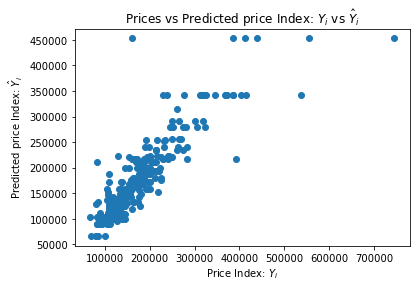

In [49]:
show_plot(forest, X_val1, y_val1)

In [50]:
forest=RandomForestRegressor(bootstrap=False, max_depth=500, max_features='auto',
                       min_samples_leaf=15,criterion='mse', n_jobs=-1, random_state=18)

forest.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=False, max_depth=500, min_samples_leaf=15,
                      n_jobs=-1, random_state=18)

In [51]:
result = evaluation(forest, X_train2, y_train2, X_val2, y_val2)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.7829810710454479
R^2 score: 0.7162205496577457
Mean Absolute Erro: 24161.226870391638
Mean Mean Squared Erro: 1653641892.1942036


### [4] XGBoost Regressor

In [52]:
xgb = XGBRegressor(learning_rate=0.01, n_estimators=1000, \
                       objective='reg:squarederror', random_state = 31)

xgb.fit(X_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=31,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

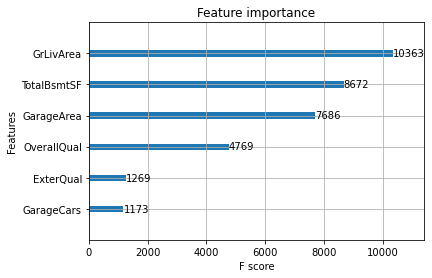

In [53]:
xgboost.plot_importance(xgb)

In [54]:
result = evaluation(xgb, X_train1, y_train1, X_val1, y_val1)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.7700815887418193
R^2 score: 0.8432683983602036
Mean Absolute Erro: 20233.890156785103
Mean Mean Squared Erro: 1036313582.9683478


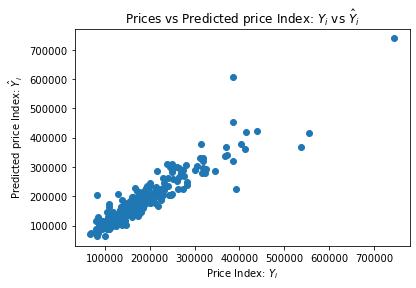

In [55]:
show_plot(xgb, X_val1, y_val1)

In [56]:
xgb = XGBRegressor(learning_rate=0.01, n_estimators=1000, \
                       objective='reg:squarederror', random_state = 31)

xgb.fit(X_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=31,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
result = evaluation(xgb, X_train2, y_train2, X_val2, y_val2)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.7717663545116069
R^2 score: 0.8415377944131167
Mean Absolute Erro: 20324.96153949058
Mean Mean Squared Erro: 1028143513.0941662


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

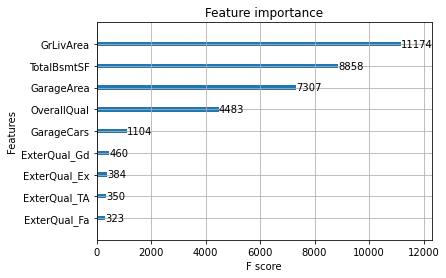

In [58]:
xgboost.plot_importance(xgb)

## Kaggle submission

TEST DATA이용

* [method1_test_df, method2_test_df]

In [59]:
ids = method2_test_df['Id']

In [60]:
models = [
    lgs, gbr, forest, xgb
]
models_name = [
    'lgs', 'gbr', 'forest', 'xgb'
]

In [61]:
results = []
for idx, model in enumerate(models):
    predictions = model.predict(method2_test_df.drop(['Id'],axis=1))
    df = pd.DataFrame(list(zip(ids, predictions)), columns =['Id', 'SalePrice'])
    df.to_csv('./dataset/result_'+models_name[idx]+'.csv',index=False)